<a href="https://colab.research.google.com/github/PerfectMach1ne/learning-google-colab/blob/main/fcc_MAGIC_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparing data

---



Based on https://www.youtube.com/watch?v=i_LwzRVP7bg and a little bit of https://bebi103a.github.io/lessons/00/setting_up_your_computer.html#Setting-up-Google-Colab (basically everything in this repo is going to be done based off of those 2 sources.)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols) # df = dataframe
df.head() # "gimme the first 5 things"

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

'g' stands for gammas and 'h' for hadrons.

In [ ]:
df["class"] = (df["class"] == 'g').astype(int) # Since we have binary data, we can convert class data representing either
# gammas or hadrons to True and False and then subsequently convert this boolean data to 1s and 0s.

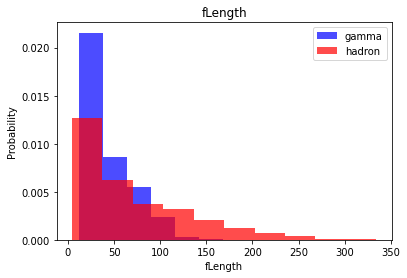

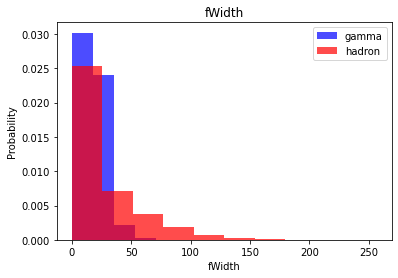

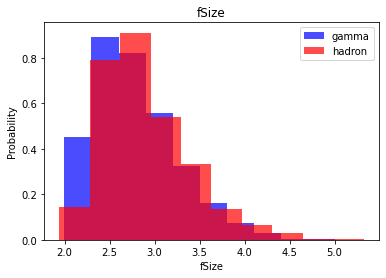

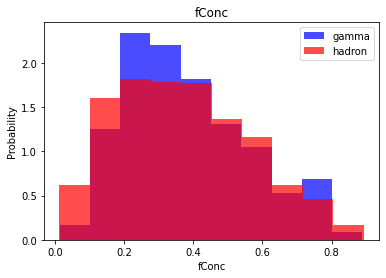

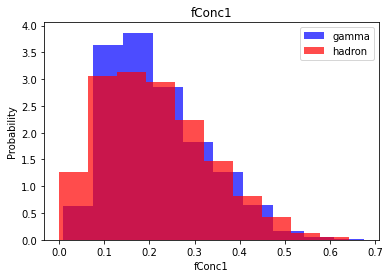

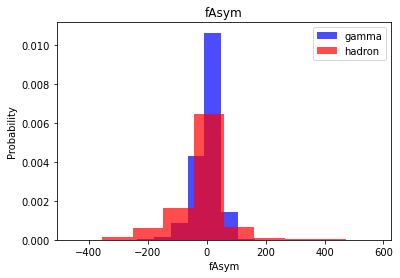

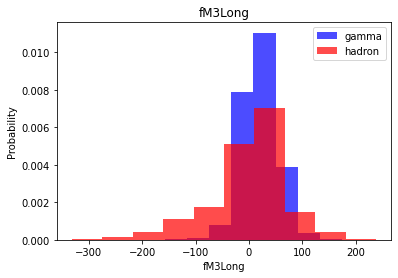

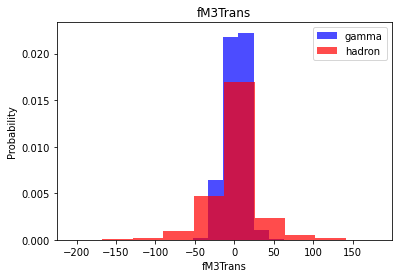

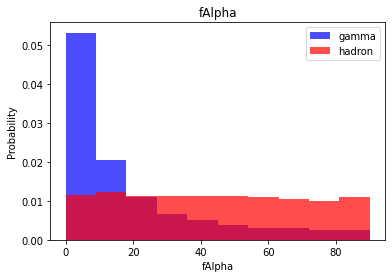

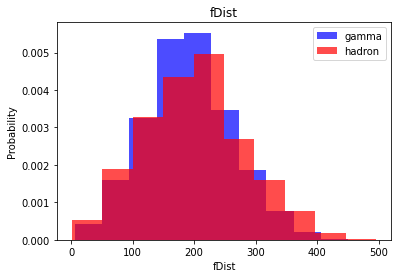

In [ ]:
for label in cols[:-1]: # list everything up till the last thing
  plt.hist(df[df["class"] == 1][label], # "inside the dataframe, get me everything where the class is == 1" and then add info about the label ig
           color='blue', label='gamma', alpha=0.7, # this alpha thing is for transparency
           density=True) # gammas
  plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha=0.7, density=True) # hadrons
  # density=True normalizes the distributions; distributing over how many samples there are
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
# Train, validation and test datasets
# df.sample(frac=1) shuffles the data
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))] # everything between 60-80% will go tow. validation
                              # and subsequently: 0-60% to train, 80-100% to test
                              )

Scaling numbers to make them relative to the mean & standard deviation of a specific column (I thing?)

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values # dataframe columns to the last item
  y = dataframe[dataframe.columns[-1]].values # THE last column

  scaler = StandardScaler()
  X = scaler.fit_transform(X) # take x and fit the standard scaler to x, then transform all the values to what they'd be and get a new x

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1)))) # take 2 arrays and horizontally stack them together (put em side by side, not on top of each other)
  # we need to reshape y to a 2D array; -1 means infer what the dimension value would be (like writing len(y) )

  return data, X, y

In [ ]:
# WHEN YOU GET AttributeError about some 'columns', rerun the dataset split code to "reset" train and other arrays
train, X_train, y_train = scale_dataset(train, oversample=True)
# print(len(train[train["class"] == 1])) # gammas
# print(len(train[train["class"] == 0])) # hadrons
print(len(y_train))
print(sum(y_train == 1))
print(sum(y_train == 0))
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

14850
7425
7425


The inconsistent amount of data could cause issues. We need to "oversample" the training data set - increase the number of hadron values to match the gamma value set better.

# k-Nearest Neighbours algorithm (kNN)

---



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5) # Amount of k neighbors
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
y_pred # y predictions

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
y_test # truth values

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.66      0.70      1293
           1       0.84      0.88      0.86      2511

    accuracy                           0.81      3804
   macro avg       0.79      0.77      0.78      3804
weighted avg       0.80      0.81      0.81      3804



Precision for classes 0 & 1 respectively (hadrons & gammas): 75% and 84%
Precision = how many are actually the class labeled by the model.
Recall = how many true positives did we get from the "set of all truth" (my wording, please get it future me)
f1-score = combined precision & recall

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74      1293
           1       0.86      0.87      0.86      2511

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Naive Bayes

---



The Bayes Rule:
\begin{equation*}
P(A|B)=\frac{P(B|A)\cdot P(A)}{P(B)}
\end{equation*}
And the Naive Bayes algorithm version:
\begin{equation*}
P(C_{k}|x)=\frac{P(x|C_{k})\cdot C_{k}}{P(x)}
\end{equation*}
A rule for Naive Bayes:
\begin{equation*}
P(C_{k}|x_{1},x_{2},...,x_{n}) \propto p(C_{k}) \prod_{i=1}^{n}p(x_{i}|C_{k})
\end{equation*}
\begin{equation*}
P(C_{k}|x_{1},x_{2},...,x_{n}) = \frac{P(x_{1},x_{2},...,x_{n}|C_{k})\cdot P(C_{k})}{P(x_{1},x_{2},...,x_{n})}
\end{equation*}
\begin{equation*}
P(C_{k},x_{1},x_{2},...,x_{n}) \propto P(x_{1},x_{2},...,x_{n}|C_{k}) \cdot P(C_{k})
\end{equation*}
\begin{equation*}
P(x_{1},x_{2},...,x_{n}|C_{k}) = P(x_{1}|C_{k})\cdot  P(x_{2}|C_{k})\cdot ... \cdot P(x_{n}|C_{k})
\end{equation*}
\begin{equation*}
P(C_{k},x_{1},x_{2},...,x_{n}) \propto p(C_{k}) \prod_{i=1}^{n}p(x_{i}|C_{k})
\end{equation*}
So: probability that we're in some category Ck given that we have all these different features x is proportional to the probability of that class in general to probability of each of these features given that we're in this 1 class that we're testing.

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.41      0.51      1293
           1       0.75      0.90      0.82      2511

    accuracy                           0.73      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.73      0.71      3804



# Logistic Regression (Log Regression)

---

Not going to rewrite the derivation from my physical notebook, so here's a ready-formula lol:
\begin{equation*}
p=\frac{1}{1+e^{-(mx+b)}}=S(mx+b)
\end{equation*}

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70      1293
           1       0.85      0.82      0.84      2511

    accuracy                           0.79      3804
   macro avg       0.76      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM - Support Vector Machines

---



In [ ]:
from sklearn.svm import SVC # Support Vector Classifier

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1293
           1       0.90      0.89      0.90      2511

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804

